<a href="https://colab.research.google.com/github/semaHbo/ev-enerji-tahmini/blob/main/Feature_Engineering/Feature_EngineeringFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler
from google.colab import drive

drive.mount('/content/drive')
veri_yolu = '/content/drive/MyDrive/ev-enerji-tahmini/temizlenmis_veri.csv'
df = pd.read_csv(veri_yolu, index_col='date', parse_dates=True)

#İç sıcaklık ve nem ortalamalarını alma
sicaklik_sutunlari = [col for col in df.columns if 'Sicaklik_' in col and 'Dis' not in col]
nem_sutunlari = [col for col in df.columns if 'Nem_' in col and 'Dis' not in col]

df['Sicaklik_IcOrtalama'] = df[sicaklik_sutunlari].mean(axis=1)
df['Nem_IcOrtalama'] = df[nem_sutunlari].mean(axis=1)

# Gereksiz sıcaklık ve nem sütunlarını sil
df.drop(columns=sicaklik_sutunlari + nem_sutunlari, inplace=True)

# Tarihsel özellikleri çıkar
df['hour'] = df.index.hour
df['day_of_month'] = df.index.day
df['is_weekend'] = df.index.weekday >= 5

# Sabit kategorilerle encoding işlemleri yapma
mevsimler = ['Kis', 'Ilkbahar', 'Yaz', 'Sonbahar']
gunler = ['Pzt', 'Salı', 'Çrş', 'Per', 'Cuma', 'Cmt', 'Paz']
aylar = ['Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran',
         'Temmuz', 'Ağustos', 'Eylül', 'Ekim', 'Kasım', 'Aralık']

df['Mevsim'] = pd.Categorical(df['Mevsim'], categories=mevsimler)
df['HaftaGunu_Adi'] = pd.Categorical(df['HaftaGunu_Adi'], categories=gunler)
df['Ay_Adi'] = pd.Categorical(df['Ay_Adi'], categories=aylar)

df = pd.get_dummies(df, columns=['Mevsim', 'HaftaGunu_Adi', 'Ay_Adi'], drop_first=False)

# Gereksiz sütunları sil
df.drop(columns=['Yil', 'Ay', 'HaftaGunu'], errors='ignore', inplace=True)

# Hedef değişken ve özellik ayrımı
y = df['Enerji_Tuketimi']
X = df.drop(columns=['Enerji_Tuketimi'])

#  Ay bazlı veri bölme (train/val/test)
train_parts, val_parts, test_parts = [], [], []
for (yil, ay), grup in df.groupby([df.index.year, df.index.month]):
    grup = grup.sort_index()
    toplam = len(grup)
    train_end = int(toplam * 0.7)
    val_end = train_end + int(toplam * 0.15)
    train_parts.append(grup.iloc[:train_end])
    val_parts.append(grup.iloc[train_end:val_end])
    test_parts.append(grup.iloc[val_end:])

df_train = pd.concat(train_parts)
df_val = pd.concat(val_parts)
df_test = pd.concat(test_parts)

# Ölçeklendirme
X_train = df_train.drop(columns=['Enerji_Tuketimi'])
y_train = df_train['Enerji_Tuketimi']
X_val = df_val.drop(columns=['Enerji_Tuketimi'])
y_val = df_val['Enerji_Tuketimi']
X_test = df_test.drop(columns=['Enerji_Tuketimi'])
y_test = df_test['Enerji_Tuketimi']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled, index=X_val.index, columns=X_val.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

train_scaled = X_train_scaled_df.copy()
train_scaled['Enerji_Tuketimi'] = y_train
val_scaled = X_val_scaled_df.copy()
val_scaled['Enerji_Tuketimi'] = y_val
test_scaled = X_test_scaled_df.copy()
test_scaled['Enerji_Tuketimi'] = y_test

train_scaled.to_csv('/content/drive/MyDrive/ev-enerji-tahmini/train1_scaled.csv')
val_scaled.to_csv('/content/drive/MyDrive/ev-enerji-tahmini/val1_scaled.csv')
test_scaled.to_csv('/content/drive/MyDrive/ev-enerji-tahmini/test1_scaled.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

# Drive'dan tekrar yükle
train_df = pd.read_csv('/content/drive/MyDrive/ev-enerji-tahmini/train1_scaled.csv', index_col='date', parse_dates=True)

print(" Satır sayısı:", train_df.shape[0])
print(" Sütun sayısı:", train_df.shape[1])
print("\n Sütun adları:")
for col in train_df.columns:
    print("-", col)


 Satır sayısı: 13813
 Sütun sayısı: 40

 Sütun adları:
- Aydinlatma_Tuketimi
- Sicaklik_DisKuzey
- Nem_DisKuzey
- Sicaklik_DisHava
- Basinc
- Nem_DisHava
- Ruzgar_Hizi
- Gorus_Mesafesi
- CiyNoktasi_Sicakligi
- Rastgele_Degisken_1
- Rastgele_Degisken_2
- Sicaklik_IcOrtalama
- Nem_IcOrtalama
- hour
- day_of_month
- is_weekend
- Mevsim_Kis
- Mevsim_Ilkbahar
- Mevsim_Yaz
- Mevsim_Sonbahar
- HaftaGunu_Adi_Pzt
- HaftaGunu_Adi_Salı
- HaftaGunu_Adi_Çrş
- HaftaGunu_Adi_Per
- HaftaGunu_Adi_Cuma
- HaftaGunu_Adi_Cmt
- HaftaGunu_Adi_Paz
- Ay_Adi_Ocak
- Ay_Adi_Şubat
- Ay_Adi_Mart
- Ay_Adi_Nisan
- Ay_Adi_Mayıs
- Ay_Adi_Haziran
- Ay_Adi_Temmuz
- Ay_Adi_Ağustos
- Ay_Adi_Eylül
- Ay_Adi_Ekim
- Ay_Adi_Kasım
- Ay_Adi_Aralık
- Enerji_Tuketimi


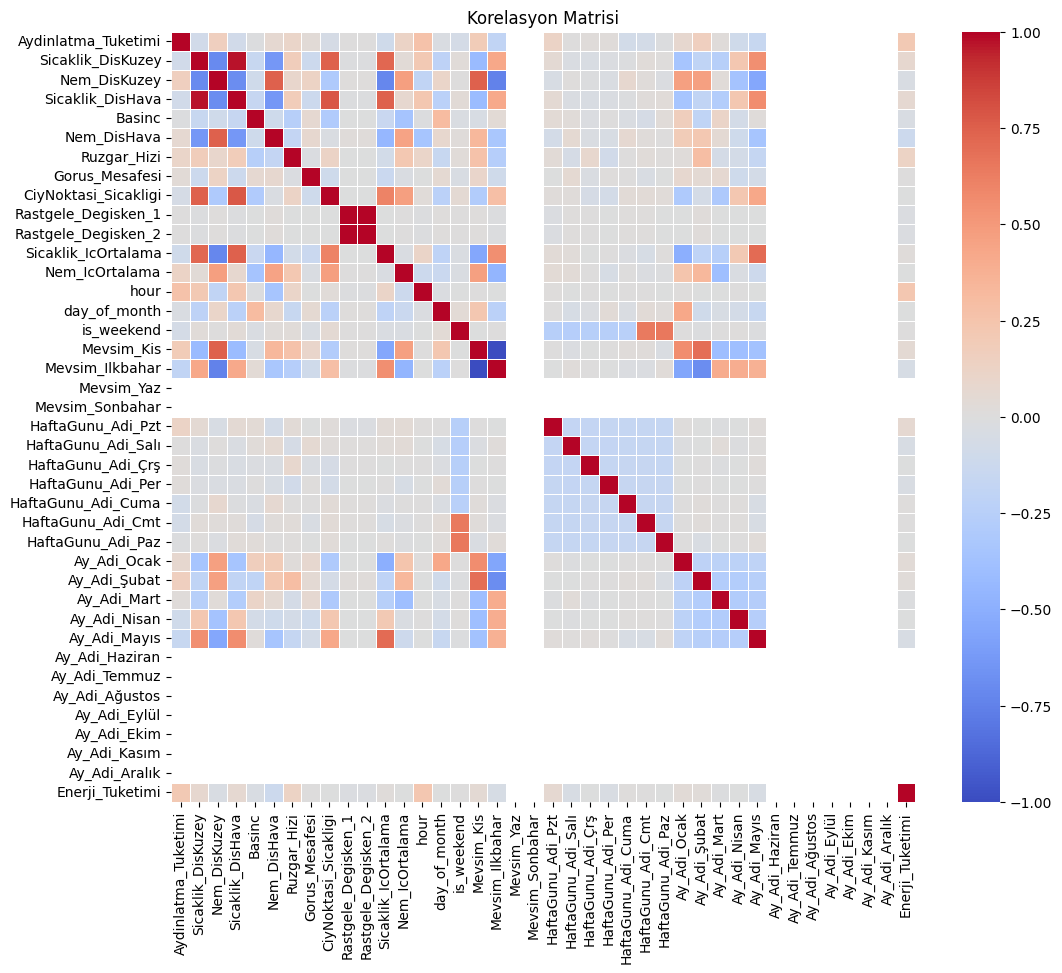

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
corr = train_df.corr()

sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Korelasyon Matrisi")
plt.show()


In [5]:
print(" Enerji_Tuketimi ile Korelasyonu En Yüksek Değişkenler:")
print(corr['Enerji_Tuketimi'].sort_values(ascending=False))


 Enerji_Tuketimi ile Korelasyonu En Yüksek Değişkenler:
Enerji_Tuketimi         1.000000
hour                    0.230024
Aydinlatma_Tuketimi     0.218585
Ruzgar_Hizi             0.125581
Sicaklik_DisKuzey       0.075701
HaftaGunu_Adi_Pzt       0.063956
Sicaklik_DisHava        0.062864
Mevsim_Kis              0.047223
Ay_Adi_Ocak             0.033060
Ay_Adi_Şubat            0.026738
Sicaklik_IcOrtalama     0.018334
HaftaGunu_Adi_Cuma      0.009354
HaftaGunu_Adi_Cmt       0.007720
is_weekend              0.003266
Gorus_Mesafesi          0.002197
Ay_Adi_Nisan           -0.000745
HaftaGunu_Adi_Paz      -0.003431
day_of_month           -0.003536
Nem_IcOrtalama         -0.004786
HaftaGunu_Adi_Çrş      -0.004866
CiyNoktasi_Sicakligi   -0.006189
Ay_Adi_Mart            -0.010238
Rastgele_Degisken_2    -0.016996
Rastgele_Degisken_1    -0.016996
HaftaGunu_Adi_Per      -0.031510
Nem_DisKuzey           -0.036017
Basinc                 -0.036427
HaftaGunu_Adi_Salı     -0.040592
Ay_Adi_Mayıs        

In [6]:
zero_cols = [col for col in train_df.columns if train_df[col].sum() == 0 and col != 'Enerji_Tuketimi']
print("Tamamen 0 olan sütunlar:")
print(zero_cols)


Tamamen 0 olan sütunlar:
['Aydinlatma_Tuketimi', 'Nem_DisKuzey', 'CiyNoktasi_Sicakligi', 'Mevsim_Ilkbahar', 'Mevsim_Yaz', 'Mevsim_Sonbahar', 'HaftaGunu_Adi_Çrş', 'Ay_Adi_Haziran', 'Ay_Adi_Temmuz', 'Ay_Adi_Ağustos', 'Ay_Adi_Eylül', 'Ay_Adi_Ekim', 'Ay_Adi_Kasım', 'Ay_Adi_Aralık']


In [7]:
# Silinecek sutunlar
silinecek_sutunlar = [
    'Mevsim_Yaz', 'Mevsim_Sonbahar',
    'Ay_Adi_Haziran', 'Ay_Adi_Temmuz', 'Ay_Adi_Ağustos',
    'Ay_Adi_Eylül', 'Ay_Adi_Ekim', 'Ay_Adi_Kasım', 'Ay_Adi_Aralık'
]


train_df = pd.read_csv('/content/drive/MyDrive/ev-enerji-tahmini/train1_scaled.csv', index_col='date', parse_dates=True)
val_df = pd.read_csv('/content/drive/MyDrive/ev-enerji-tahmini/val1_scaled.csv', index_col='date', parse_dates=True)
test_df = pd.read_csv('/content/drive/MyDrive/ev-enerji-tahmini/test1_scaled.csv', index_col='date', parse_dates=True)

train_df.drop(columns=silinecek_sutunlar, inplace=True, errors='ignore')
val_df.drop(columns=silinecek_sutunlar, inplace=True, errors='ignore')
test_df.drop(columns=silinecek_sutunlar, inplace=True, errors='ignore')

train_df.to_csv('/content/drive/MyDrive/ev-enerji-tahmini/train1_scaled_cleaned.csv')
val_df.to_csv('/content/drive/MyDrive/ev-enerji-tahmini/val1_scaled_cleaned.csv')
test_df.to_csv('/content/drive/MyDrive/ev-enerji-tahmini/test1_scaled_cleaned.csv')


In [8]:
import pandas as pd

train_path = '/content/drive/MyDrive/ev-enerji-tahmini/train1_scaled_cleaned.csv'
train_df = pd.read_csv(train_path, index_col='date', parse_dates=True)


In [9]:
train_df.head(10)


,Aydinlatma_Tuketimi,Sicaklik_DisKuzey,Nem_DisKuzey,Sicaklik_DisHava,Basinc,Nem_DisHava,Ruzgar_Hizi,Gorus_Mesafesi,CiyNoktasi_Sicakligi,Rastgele_Degisken_1,...,HaftaGunu_Adi_Per,HaftaGunu_Adi_Cuma,HaftaGunu_Adi_Cmt,HaftaGunu_Adi_Paz,Ay_Adi_Ocak,Ay_Adi_Şubat,Ay_Adi_Mart,Ay_Adi_Nisan,Ay_Adi_Mayıs,Enerji_Tuketimi
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,3.240666,-0.092088,0.896528,-0.103655,-2.626000,0.800821,1.350410,1.982426,0.455632,-0.799281,...,-0.408696,-0.395943,-0.395943,-0.401188,2.398859,-0.518084,-0.540614,-0.52942,-0.492568,60
2016-01-11 17:10:00,3.240666,-0.122917,0.890472,-0.124622,-2.614079,0.800821,1.207500,1.671970,0.431315,-0.431959,...,-0.408696,-0.395943,-0.395943,-0.401188,2.398859,-0.518084,-0.540614,-0.52942,-0.492568,60
2016-01-11 17:20:00,3.240666,-0.166504,0.862074,-0.145589,-2.602157,0.800821,1.064591,1.361514,0.406999,0.259616,...,-0.408696,-0.395943,-0.395943,-0.401188,2.398859,-0.518084,-0.540614,-0.52942,-0.492568,50
2016-01-11 17:30:00,4.484126,-0.186702,0.870427,-0.166556,-2.590235,0.800821,0.921681,1.051058,0.382682,1.415016,...,-0.408696,-0.395943,-0.395943,-0.401188,2.398859,-0.518084,-0.540614,-0.52942,-0.492568,50
2016-01-11 17:40:00,4.484126,-0.197333,0.916469,-0.187523,-2.578313,0.800821,0.778771,0.740602,0.358365,-1.019184,...,-0.408696,-0.395943,-0.395943,-0.401188,2.398859,-0.518084,-0.540614,-0.52942,-0.492568,60
2016-01-11 17:50:00,4.484126,-0.207964,0.943823,-0.208490,-2.566391,0.800821,0.635862,0.430146,0.334049,1.381189,...,-0.408696,-0.395943,-0.395943,-0.401188,2.398859,-0.518084,-0.540614,-0.52942,-0.492568,50
2016-01-11 18:00:00,5.727586,-0.213811,0.953950,-0.229457,-2.554469,0.800821,0.492952,0.119691,0.309732,1.540657,...,-0.408696,-0.395943,-0.395943,-0.401188,2.398859,-0.518084,-0.540614,-0.52942,-0.492568,60
2016-01-11 18:10:00,5.727586,-0.225504,0.964391,-0.226462,-2.546521,0.790184,0.564407,0.119691,0.305680,0.562612,...,-0.408696,-0.395943,-0.395943,-0.401188,2.398859,-0.518084,-0.540614,-0.52942,-0.492568,60
2016-01-11 18:20:00,4.484126,-0.236135,0.989552,-0.223467,-2.538573,0.779548,0.635862,0.119691,0.301627,0.453451,...,-0.408696,-0.395943,-0.395943,-0.401188,2.398859,-0.518084,-0.540614,-0.52942,-0.492568,60


In [10]:
print(" Satır sayısı:", train_df.shape[0])
print(" Sütun sayısı:", train_df.shape[1])
print(" Sütun adları:")
for col in train_df.columns:
    print("-", col)


 Satır sayısı: 13813
 Sütun sayısı: 31
 Sütun adları:
- Aydinlatma_Tuketimi
- Sicaklik_DisKuzey
- Nem_DisKuzey
- Sicaklik_DisHava
- Basinc
- Nem_DisHava
- Ruzgar_Hizi
- Gorus_Mesafesi
- CiyNoktasi_Sicakligi
- Rastgele_Degisken_1
- Rastgele_Degisken_2
- Sicaklik_IcOrtalama
- Nem_IcOrtalama
- hour
- day_of_month
- is_weekend
- Mevsim_Kis
- Mevsim_Ilkbahar
- HaftaGunu_Adi_Pzt
- HaftaGunu_Adi_Salı
- HaftaGunu_Adi_Çrş
- HaftaGunu_Adi_Per
- HaftaGunu_Adi_Cuma
- HaftaGunu_Adi_Cmt
- HaftaGunu_Adi_Paz
- Ay_Adi_Ocak
- Ay_Adi_Şubat
- Ay_Adi_Mart
- Ay_Adi_Nisan
- Ay_Adi_Mayıs
- Enerji_Tuketimi


In [11]:
train_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Aydinlatma_Tuketimi,13813.0,0.000000e+00,1.000036,-0.489714,-0.489714,-0.489714,-0.489714,8.214507
Sicaklik_DisKuzey,13813.0,-6.584339e-17,1.000036,-2.179711,-0.702296,-0.139927,0.562238,3.298606
Nem_DisKuzey,13813.0,0.000000e+00,1.000036,-1.711188,-0.834972,0.077160,0.928702,1.386499
Sicaklik_DisHava,13813.0,-1.316868e-16,1.000036,-2.188368,-0.714692,-0.112641,0.573277,3.400818
Basinc,13813.0,-2.074067e-15,1.000036,-3.126719,-0.716513,0.078279,0.819422,1.999688
Nem_DisHava,13813.0,-6.584339e-17,1.000036,-3.538842,-0.624461,0.290272,0.790184,1.311369
Ruzgar_Hizi,13813.0,-6.584339e-17,1.000036,-1.650693,-0.793235,-0.221596,0.492952,4.351513
Gorus_Mesafesi,13813.0,1.152259e-16,1.000036,-3.038860,-0.771183,0.119691,0.119691,2.225391
CiyNoktasi_Sicakligi,13813.0,0.000000e+00,1.000036,-2.438035,-0.654823,-0.127965,0.666375,2.935917
Rastgele_Degisken_1,13813.0,-1.440324e-16,1.000036,-1.713674,-0.860941,-0.012643,0.873450,1.731029


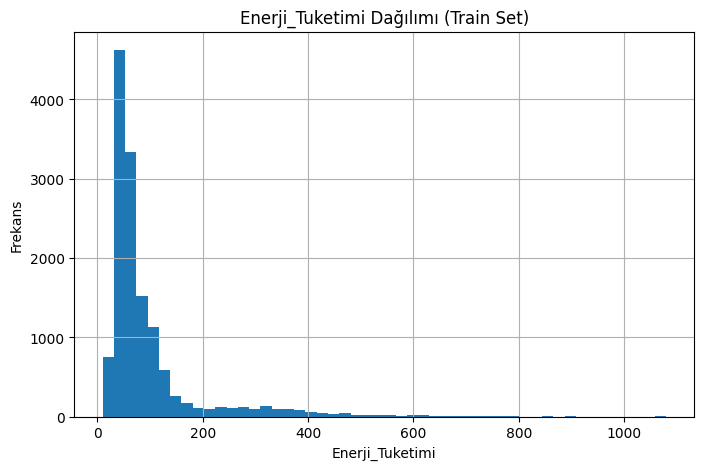

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
train_df['Enerji_Tuketimi'].hist(bins=50)
plt.title("Enerji_Tuketimi Dağılımı (Train Set)")
plt.xlabel("Enerji_Tuketimi")
plt.ylabel("Frekans")
plt.grid(True)
plt.show()


In [13]:
print(" Eksik veri var mı")
print(train_df.isnull().sum())


 Eksik veri var mı
Aydinlatma_Tuketimi     0
Sicaklik_DisKuzey       0
Nem_DisKuzey            0
Sicaklik_DisHava        0
Basinc                  0
Nem_DisHava             0
Ruzgar_Hizi             0
Gorus_Mesafesi          0
CiyNoktasi_Sicakligi    0
Rastgele_Degisken_1     0
Rastgele_Degisken_2     0
Sicaklik_IcOrtalama     0
Nem_IcOrtalama          0
hour                    0
day_of_month            0
is_weekend              0
Mevsim_Kis              0
Mevsim_Ilkbahar         0
HaftaGunu_Adi_Pzt       0
HaftaGunu_Adi_Salı      0
HaftaGunu_Adi_Çrş       0
HaftaGunu_Adi_Per       0
HaftaGunu_Adi_Cuma      0
HaftaGunu_Adi_Cmt       0
HaftaGunu_Adi_Paz       0
Ay_Adi_Ocak             0
Ay_Adi_Şubat            0
Ay_Adi_Mart             0
Ay_Adi_Nisan            0
Ay_Adi_Mayıs            0
Enerji_Tuketimi         0
dtype: int64
